# EDA To Prediction (DIeTanic)

The sinking of the Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. That's why the name DieTanic. This is a very unforgetable disaster that no one in the world can forget.

It took about $7.5 million to build the Titanic and it sunk under the ocean due to collision. The Titanic Dataset is a very good dataset for begineers to start a journey in data science and participate in competitions in Kaggle.

The Objective of this notebook is to give an idea how is the workflow in any predictive modeling problem. How do we check features, how do we add new features and some Machine Learning Concepts. I have tried to keep the notebook as basic as possible so that even newbies can understand every phase of it.

If You Like the notebook and think that it helped you..PLEASE UPVOTE. It will keep me motivated.

### Contents of the Notebook:

#### Part1: Exploratory Data Analysis(EDA):
1) Analysis of the features.

2) Finding any relations or trends considering multiple features.

#### Part2: Feature Engineering and Data Cleaning:
1) Adding any few features.

2) Removing redundant features.

3) Converting features into suitable form for modeling.

#### Part3: Predictive Modeling
1) Running Basic Algorithms.

2) Cross Validation.

3) Ensembling.

4) Important Features Extraction.

### Part:1 Exploratory Data Analysis(EDA)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
data=pd.read_csv('train.csv')

In [5]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
data.isnull().sum() # checking for total null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

The __Age, Cabin and Embarked__ have null values. I will try to fix them. 

### How many Survived?

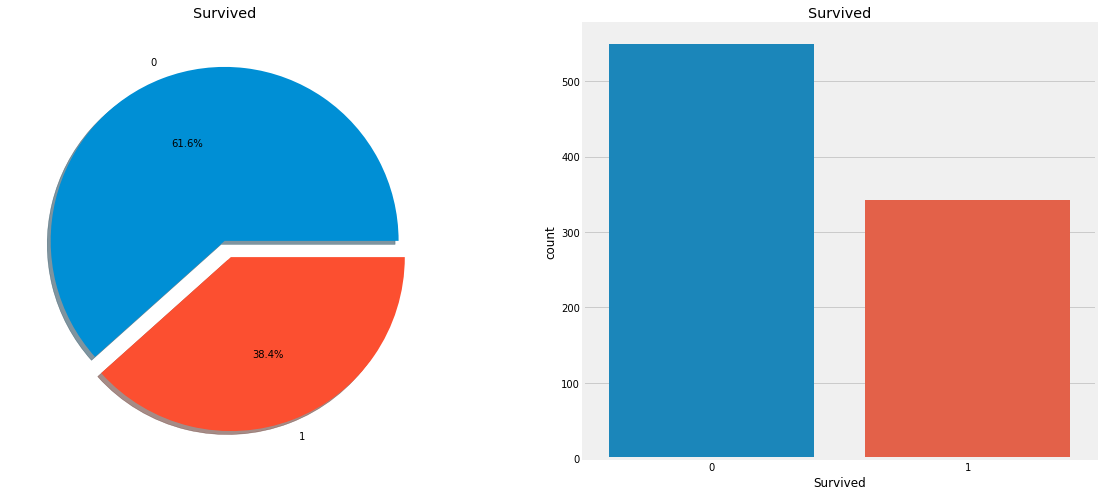

In [11]:
f, ax= plt.subplots(1,2,figsize=(18,8))
data['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=data, ax=ax[1])
ax[1].set_title('Survived')
plt.show()

It is evident that not many passengers survived the accident.

Out of 891 passengers in training set, only around 350 survived i.e Only 38.4% of the total training set survived the crash. We need to dig down more to get better insights from the data and see which categories of the passengers did survive and who didn't.

We will try to check the survival rate by using the different features of the dataset. Some of the features being Se, Port Of Embarcation, Age, etc.

First let us understand the different types of features.

### Types Of Features

#### Categorical Features:
A categorical variable is one that has two or more categories and each value in that feature can be categorised by them. For example, gender is a categorical variable having two categories (male and female). Now we cannot sort or give any ordering to such variables. They are also known as __Nominal Variables.__

Categorical Features in the dataset: Sex, Embarked.

#### Ordinal Features:
An ordinal variable is similar to categorical values, but the difference between them is that we can have relative ordering or sorting between the values. For eg: I we have a feature like __Height__ with values __Tall, Medium, Short,__ then Height is a ordinal variable. Here we can have a relative sort in the variable.

Ordinal Features in the dataset: PClass

#### Continous Feature:
A feature is said to be continous if it can take values between any two points or between the minimum or maximum values in the features column.

Continous Features in the dataset: Age

### Analysing The Features

#### Sex --> Categorical Feature

In [12]:
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

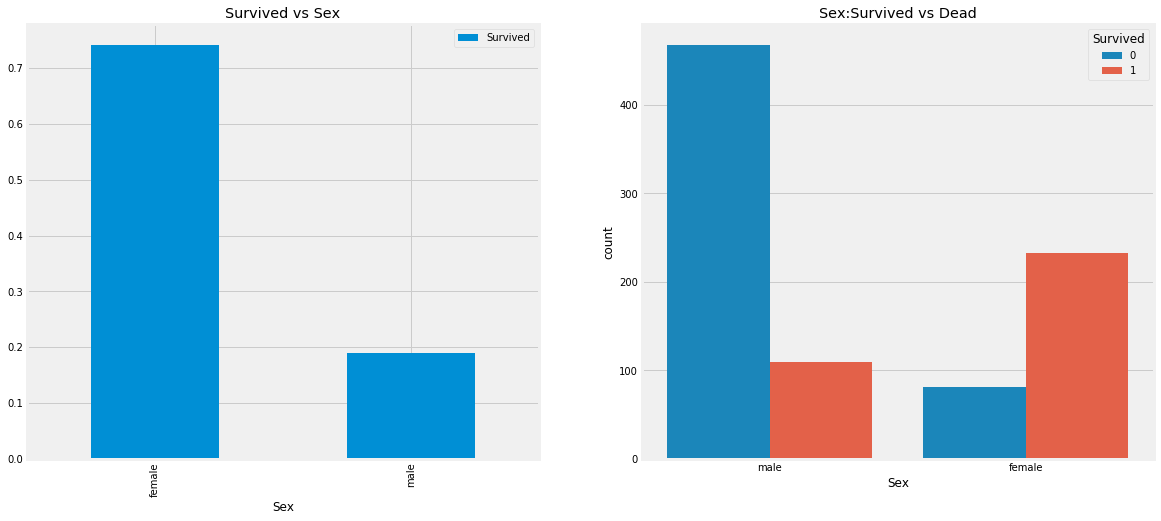

In [13]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

This looks interesting. The number of men on the ship is lot more than the number of women. Still the number of women saved is almost twice the number of males saved. The survival rates for a __women on the ship is around 75% while that for men in around 18~19%__.

This looks to be a __very important__ feature for modeling. But is it the best??
Let's check other features.

### Pcalss --> Ordinal Feature

In [14]:
pd.crosstab(data.Pclass, data.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


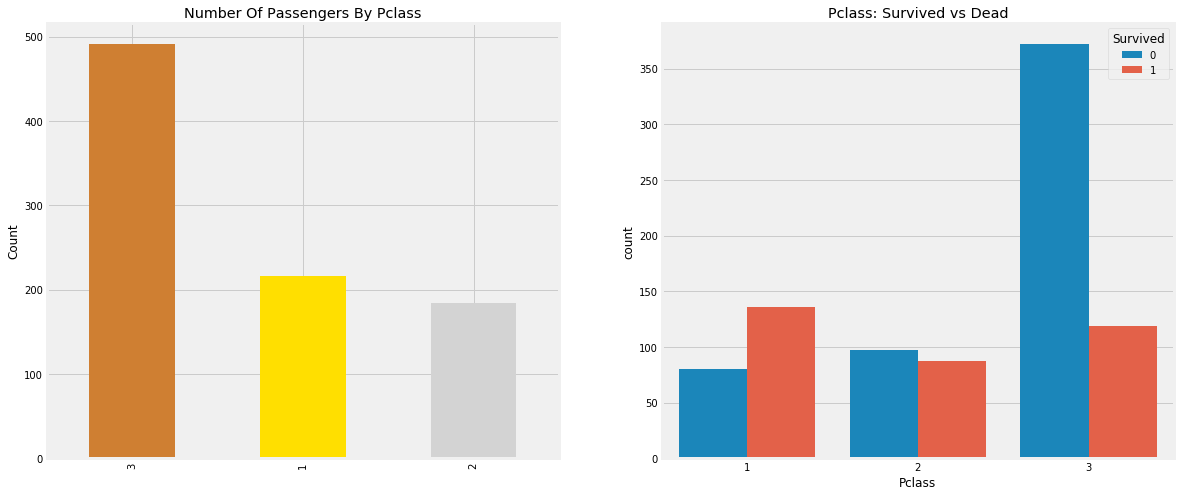

In [16]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Pclass'].value_counts().plot.bar(color=['#CF7F32','#FFDF00','#D3D3D3'], ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass',hue='Survived',data=data, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead')
plt.show()

People say __Money Can't Buy Everything.__ But we can clearly see that Passengers Of Pclass 1 were given a very high priority while rescue. Even thoygh the number of Passengers in Pclass 3 were a lot higher, still the number of survival from them is very low, somewhere around __25%__.

For Pclass 1% survived is around __63%__ while for Pclass2 is around __48%__. So money and status matters. Such a materialistic world.

Let's Dive in little bit more and check for other interesting observations. Let's check survival rate with Sex and Pclass together.

In [17]:
pd.crosstab([data.Sex, data.Survived], data.Pclass, margins=True).style.background_gradient(cmap='summer_r')

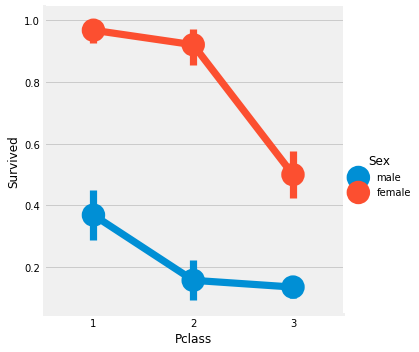

In [18]:
sns.factorplot('Pclass','Survived',hue='Sex',data=data)
plt.show()

We use __FactorPlot__ in this case, becaues they make the seperation of categorical values easy.

Looking at the __CrossTab__ and the __FactorPlot__, we can easily infer that survival for __Women from Pclass1__ is about __95~96%__, as only 3 out of 94 Women from Pclass2 died.

It is evident that irrespective of Pclass, Women were given first priority while rescue. Even Men from Pclass1 have a very low survival rate.

Looks like Pclass is also an important feature. Let's analyse other features.

### Age --> Continous Feature

In [19]:
print('Oldest Passsenger was of:', data['Age'].max(),'Years')
print('Youngest Passenger was of:', data['Age'].min(), 'Years')
print('Average Age on the ship:', data['Age'].mean(), 'Years')

Oldest Passsenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


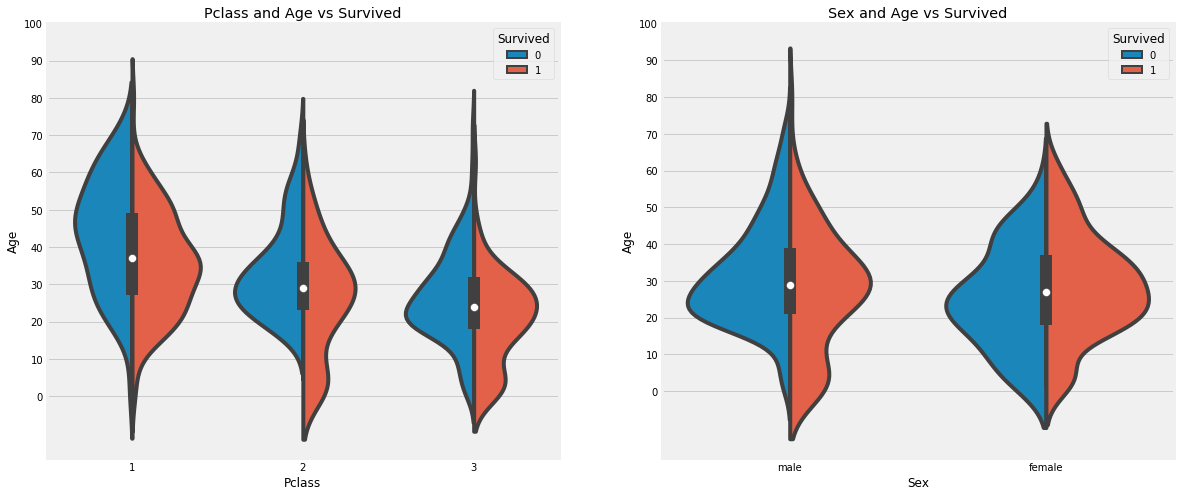

In [20]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass","Age",hue="Survived",data=data,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age", hue="Survived", data=data, split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

#### Observations:
1) The number of children increases with Pclass and the survival rate for passengers below Age 10(i.e children) looks to be good irrespective of the Pclass.

2) Survival chances for Passengers aged 20~50 from Pclass1 is high and is even better for Women.

3) For males, the survival chances decreases with an increase in age.

As we had seen earlier, the Age feature has __177__ null values. To replace these NaN values, we can assign them the mean age of the dataset.

But the problem is, there were many people with many different ages. We just can't assign a 4 year kid with the mean age that is 29 years. Is there any way to find out what age-band does the passenger lie??

__Bingo!!!__, we can check the __Name__ feature. Looking upon the feature, we can see that the names have a salutation like Mr or Mrs. Thus we can assign the mean values of Mr and Mrs to the respective groups.

__"What's In A Name??" ---> Featrue__

In [29]:
data['Initial']=0
for i in data:
    data['Initial']=data.Name.str.extract('([A-Za-z]+)\.')

Okay so here we are using the Regax:__[A~Za~z]+). So what is does is, it looks for strings which lie between __A~Z or a~z and followed by a.(dot).So we succesfully extract the Initials from the name.

In [23]:
pd.crosstab(data.Initial, data.Sex).T.style.background_gradient(cmap='summer_r')

Okay so there are some misspelled Initials like Mlle or Mme that stand for Miss. I will replace them with Miss and same thing for other values.

In [30]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'], inplace=True)

Okay so here we are using the Regex:__[A-Za-z]+)__.. So What is does is, it looks for strings which lie between __A-Z or a-z__ and followed by a .(dot).So we succesfully extract the Initials from the Name.